<a href="https://colab.research.google.com/github/lmcanavals/analytics_visualization/blob/main/notebooks/bc_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygam

In [ ]:
!pip install dmba

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
"""
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage

from dmba import stepwise_selection
from dmba import AIC_score"""

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
BASE_URL    = "https://raw.githubusercontent.com/lmcanavals/avd/main/data/"
LUNG_CSV    = "LungDisease.csv"
HOUSE_CSV   = "house_sales.csv"

In [ ]:
file = BASE_URL + LUNG_CSV
!curl -O $file 2>/dev/null
file = BASE_URL + HOUSE_CSV
!curl -O $file 2>/dev/null

In [ ]:
!ls -l

total 3472
-rw-r--r-- 1 root root 3545162 Feb 20 01:14 house_sales.csv
-rw-r--r-- 1 root root     832 Feb 20 01:14 LungDisease.csv
drwxr-xr-x 1 root root    4096 Feb 16 16:35 sample_data


In [ ]:
lung = pd.read_csv(LUNG_CSV)

lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


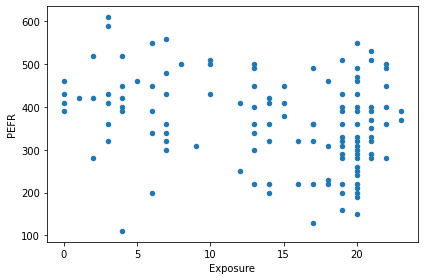

In [ ]:
lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

In [ ]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


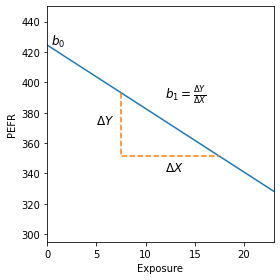

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict([[0], [23]]))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = [[7.5], [17.5]]
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

In [ ]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

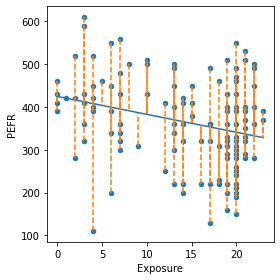

In [ ]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

## Regresión lineal multiple

In [ ]:
!head -n 3 house_sales.csv

"DocumentDate"	"SalePrice"	"PropertyID"	"PropertyType"	"ym"	"zhvi_px"	"zhvi_idx"	"AdjSalePrice"	"NbrLivingUnits"	"SqFtLot"	"SqFtTotLiving"	"SqFtFinBasement"	"Bathrooms"	"Bedrooms"	"BldgGrade"	"YrBuilt"	"YrRenovated"	"TrafficNoise"	"LandVal"	"ImpsVal"	"ZipCode"	"NewConstruction"
"1"	"2014-09-16"	280000	1000102	"Multiplex"	"2014-09-01"	405100	0.930836397058823	300805	2	9373	2400	0	3	6	7	1991	0	0	70000	229000	98002	FALSE
"2"	"2006-06-16"	1000000	1200013	"Single Family"	"2006-06-01"	404400	0.929227941176471	1076162	1	20156	3764	1452	3.75	4	10	2005	0	0	203000	590000	98166	TRUE


In [ ]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']

house = pd.read_csv(HOUSE_CSV, sep='\t')
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome    = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficientes:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficientes:
 SqFtTotLiving: 228.83060360240796
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321056
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898083


Entendamos

In [ ]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage

from dmba import stepwise_selection
from dmba import AIC_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


no display found. Using non-interactive Agg backend


In [ ]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:36:50   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

## Valores influyentes

In [ ]:
%matplotlib inline

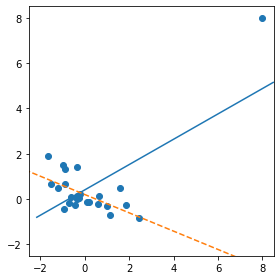

In [ ]:
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope*x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intecept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intecept, ax))
slope, intecept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intecept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()